<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/ATHENSVOICE_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [2]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [3]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [4]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [5]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [6]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [7]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 89.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

In [9]:
nlp = spacy.load('el_core_news_sm')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
airbnb_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_AthensVoice_Airbnb.csv")
# airbnb_df = pd.read_csv(data_csv_url)

In [12]:
airbnb_df

article_url  \
0   https://www.athensvoice.gr/epikairotita/diethn...   
1   https://www.athensvoice.gr/epikairotita/politi...   
2   https://www.athensvoice.gr/epikairotita/ellada...   
3   https://www.athensvoice.gr/epikairotita/koinon...   
4   https://www.athensvoice.gr/epikairotita/koinon...   
..                                                ...   
75  https://www.athensvoice.gr/life/tehnologia-epi...   
76  https://www.athensvoice.gr/life/tehnologia-epi...   
77  https://www.athensvoice.gr/epikairotita/politi...   
78  https://www.athensvoice.gr/epikairotita/diethn...   
79  https://www.athensvoice.gr/epikairotita/diethn...   

                                                title        date      time  \
0   Iσπανία: Δικαστήριο απορρίπτει έφεση της Airbn...  2025-06-19  20:22:46   
1   Το ΣτΕ έκρινε παράνομη την εγκύκλιο της ΑΔΑΕ γ...  2025-04-22  15:52:07   
2   Αirbnb: To ΣτΕ αποφαίνεται για την μεταβολή τη...  2025-04-02  14:53:00   
3   Νεκρός σε Airbnb στα Σεπόλια: Ερωτικό παιχνίδι...  2025-03-13  17:18:21   
4   Σεπόλια: Μυστήριο γύρω από το νεκρό στο Airbnb...  2025-03-13  15:33:00   
..                                                ...         ...       ...   
75  Κορωνοϊός: Η Airbnb εκδίδει πιστοποιητικό συμμ...  2020-10-02  10:32:09   
76  ZEROe: Τα πρώτα αεροπλάνα της Airbus με μηδενι...  2020-09-22  18:40:32   
77  Airbnb: «Κατεβαίνουν» χιλιάδες αγγελίες διαμερ...  2020-08-30  12:54:38   
78  Airbnb: Aπαγόρευση των πάρτι και των κοινωνικώ...  2020-08-20  13:45:00   
79  Κορωνοϊός: Η Airbnb «απαγορεύει» τα πάρτι των ...  2020-08-14  14:08:53   

                  section                author  \
0                  Κοσμος              Newsroom   
1    Πολιτικη & Οικονομια              Newsroom   
2                  Ελλαδα              Newsroom   
3                Κοινωνια      Γιώργος Σόμπολος   
4                Κοινωνια      Γιώργος Σόμπολος   
..                    ...                   ...   
75  Τεχνολογια - Επιστημη  Γεράσιμος Τζαμαρέλος   
76  Τεχνολογια - Επιστημη              Newsroom   
77   Πολιτικη & Οικονομια              Newsroom   
78                 Κοσμος              Newsroom   
79                 Κοσμος              Newsroom   

                                              excerpt  \
0   Iσπανία: Δικαστήριο απορρίπτει έφεση της Airbn...   
1   Το ΣτΕ έκρινε παράνομη την εγκύκλιο της ΑΔΑΕ γ...   
2   Αirbnb: To ΣτΕ αποφαίνεται για την μεταβολή τη...   
3   Νεκρός σε Airbnb στα Σεπόλια: Ερωτικό παιχνίδι...   
4   Μυστήριο γύρω από το νεκρό στο Airbnb - Τι εξε...   
..                                                ...   
75  Πώς μπορείτε να κατεβάσετε το σχετικό εγχειρίδ...   
76  Η Airbus σχεδιάζει Τα πρώτα αεροπλάνα με μηδεν...   
77  Πάνω από 3.000 αγγελίες ενοικίασης διαμερισμάτ...   
78  Καθολική απαγόρευση των πάρτι και των κοινωνικ...   
79  Η Airbnb προσπαθεί να εμποδίσει τους κάτω των ...   

                                             subtitle  \
0         Καθώς η χώρα αντιμετωπίζει στεγαστική κρίση   
1   Παραπέμφθηκε στη Ολομέλεια για τελική κρίση λό...   
2                           Το σκεπτικό της προσφυγής   
3   Αποκλείστηκε το ενδεχόμενο της εγκληματικής εν...   
4   Ο νεκρός είχε δεμένα τα άκρα, στο κεφάλι του υ...   
..                                                ...   
75  Ο αναλυτικός οδηγός για το νέο ειδικόν υγειονο...   
76                  Θα μεταφέρει 100 έως 200 επιβάτες   
77  Η αγορά βραχυχρόνιων μισθώσεων επιστρέφει στο ...   
78  «Η καθιέρωση παγκόσμιας απαγόρευσης πάρτι και ...   
79  Μία προσπάθεια της εταιρείας για την προφύλαξη...   

                                            text_body  \
0   Ένα δικαστήριο της Ισπανίας απέρριψε την Πέμπτ...   
1   To Β΄ Τμήμα του Συμβουλίου της Επικρατείας με ...   
2   Συζητήθηκαν σήμερα στην 7μελή σύνθεση του Ε΄ Τ...   
3   Στο ενδεχόμενο του ερωτικού παιχνιδιού ή κάποι...   
4   Το ενδεχόμενο ενός ερωτικού παιχνιδιού που είχ...   
..                                                ...   
75  Η Airbnb προκειμένου ν

In [13]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(78, 10)

In [14]:
airbnb_df.tail(15)

article_url  \
63  https://www.athensvoice.gr/epikairotita/diethn...   
64  https://www.athensvoice.gr/epikairotita/diethn...   
65  https://www.athensvoice.gr/life/perivallon/733...   
66  https://www.athensvoice.gr/epikairotita/diethn...   
67  https://www.athensvoice.gr/epikairotita/diethn...   
68  https://www.athensvoice.gr/epikairotita/ellada...   
69  https://www.athensvoice.gr/epikairotita/ellada...   
70  https://www.athensvoice.gr/epikairotita/ellada...   
71  https://www.athensvoice.gr/epikairotita/ellada...   
72  https://www.athensvoice.gr/epikairotita/diethn...   
73  https://www.athensvoice.gr/life/tehnologia-epi...   
74  https://www.athensvoice.gr/life/tehnologia-epi...   
75  https://www.athensvoice.gr/epikairotita/politi...   
76  https://www.athensvoice.gr/epikairotita/diethn...   
77  https://www.athensvoice.gr/epikairotita/diethn...   

                                                title        date      time  \
63  Ουκρανία: Γιατί αυξάνονται οι κρατήσεις σε Air...  2022-03-06  11:50:00   
64  Συμφωνία Air France/KLM – Airbus για αγορά 104...  2021-12-16  20:29:00   
65  Airbus πέταξε για τρεις ώρες αποκλειστικά με μ...  2021-10-29  16:55:00   
66  Airbnb: Δωρεάν διαμονή σε 20.000 Αφγανούς πρόσ...  2021-08-24  11:11:46   
67  Η Airbnb «πληρώνει 7 εκ. δολάρια μετά από κατα...  2021-06-16  06:21:00   
68  Airbnb: Τι αλλάζει για οικοδεσπότες στην Ελλάδ...  2021-05-11  06:55:00   
69  Πάσχα 2021: Αύξηση ως 100% σε ενοικιάσεις Airb...  2021-04-28  06:05:00   
70         ΑΑΔΕ: Συμφωνία με Airbnb, Booking και VRBO  2021-04-27  10:43:00   
71  Θεσσαλονίκη: Νοίκιασε Airbnb για να κάνει κορω...  2021-02-20  11:25:47   
72  Η Airbnb μπλοκάρει τις κρατήσεις κατά την ορκω...  2021-01-13  16:18:00   
73  Κορωνοϊός: Η Airbnb εκδίδει πιστοποιητικό συμμ...  2020-10-02  10:32:09   
74  ZEROe: Τα πρώτα αεροπλάνα της Airbus με μηδενι...  2020-09-22  18:40:32   
75  Airbnb: «Κατεβαίνουν» χιλιάδες αγγελίες διαμερ...  2020-08-30  12:54:38   
76  Airbnb: Aπαγόρευση των πάρτι και των κοινωνικώ...  2020-08-20  13:45:00   
77  Κορωνοϊός: Η Airbnb «απαγορεύει» τα πάρτι των ...  2020-08-14  14:08:53   

                  section                author  \
63                 Κοσμος              Newsroom   
64                 Κοσμος              Newsroom   
65             Περιβαλλον              Newsroom   
66                 Κοσμος              Newsroom   
67                 Κοσμος              Newsroom   
68                 Ελλαδα              Newsroom   
69                 Ελλαδα              Newsroom   
70                 Ελλαδα              Newsroom   
71                 Ελλαδα              Newsroom   
72                 Κοσμος              Newsroom   
73  Τεχνολογια - Επιστημη  Γεράσιμος Τζαμαρέλος   
74  Τεχνολογια - Επιστημη              Newsroom   
75   Πολιτικη & Οικονομια              Newsroom   
76                 Κοσμος              Newsroom   
77                 Κοσμος              Newsroom   

                                              excerpt  \
63  Πόλεμος στην Ουκρανία: Αύξηση κρατήσεων μέσω A...   
64  H Air France-KLM ανακοίνωσε σήμερα ότι θα αγορ...   
65  Πτήση αποκλειστικά με μαγειρικά έλαια έκανε Ai...   
66  Η πλατφόρμα βραχυχρόνιας μίσθωσης ακινήτων Air...   
67  Η τουρίστρια δέχτηκε την επίθεση μέσα σε ενοικ...   
68  Συμφωνία Airbnb και ΑΑΔΕ - Για υποχρεωτικό Αρι...   
69  Αύξηση ως 100% στις κρατήσεις σε βίλες και μον...   
70  ΑΑΔΕ: Πρωτόκολλο συνεργασίας με Airbnb, Bookin...   
71  Συνελήφθη από αστυνομικούς 50χρονος διοργανωτή...   
72  ΗΠΑ: Η Airbnb ακυρώνει και μπλοκάρει τις κρατή...   
73  Πώς μπορείτε να κατεβάσετε το σχετικό εγχειρίδ...   
74  Η Airbus σχεδιάζει Τα πρώτα αεροπλάνα με μηδεν...   
75  Πάνω από 3.000 αγγελίες ενοικίασης διαμερισμάτ...   
76  Καθολική απαγόρευση των πάρτι και των κοινωνικ...   
77  Η Airbnb προσπαθεί να εμποδίσει τους κάτω των ...   

                                             subtitle  \
63                       Η συγκινητική κίνηση πολιτών   
64                  

In [15]:
len(airbnb_df)

78

In [16]:
airbnb_df = airbnb_df.iloc[:-14]

In [17]:
airbnb_df.to_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_AthensVoice_Airbnb.csv", index=False)

In [18]:
airbnb_df.tail(10)

article_url  \
54  https://www.athensvoice.gr/life/life-in-athens...   
55  https://www.athensvoice.gr/life/life-in-athens...   
56  https://www.athensvoice.gr/epikairotita/diethn...   
57  https://www.athensvoice.gr/epikairotita/ellada...   
58  https://www.athensvoice.gr/epikairotita/politi...   
59  https://www.athensvoice.gr/epikairotita/diethn...   
60  https://www.athensvoice.gr/epikairotita/diethn...   
61  https://www.athensvoice.gr/epikairotita/diethn...   
62  https://www.athensvoice.gr/epikairotita/diethn...   
63  https://www.athensvoice.gr/epikairotita/diethn...   

                                                title        date      time  \
54  Airbnb: Οι 3 κορυφαίες περιοχές της Αθήνας που...  2022-10-28  19:34:57   
55  Κώστας Μπακογιάννης: «Να μην κάνουμε Ντίσνεϋλα...  2022-10-02  12:54:00   
56  Τα ξενοδοχεία Hilton τρολάρουν τα Airbnb (βίντεο)  2022-09-24  11:44:00   
57  Αναστάτωση στο «Ελ. Βενιζέλος»: Αεροσκάφος Air...  2022-08-14  16:45:00   
58  Airbnb: Eίχε το πιο κερδοφόρο τρίμηνο στην ιστ...  2022-08-03  07:55:56   
59  Eυρωβουλευτές ζητούν από την Κομισιόν να θεσμο...  2022-07-31  10:59:54   
60  Η Airbnb απαγορεύει οριστικά πάρτι και γιορτές...  2022-06-29  06:54:00   
61  Airbnb τέλος στην Κίνα λόγω των περιορισμών γι...  2022-05-24  12:37:00   
62  Πόλεμος-Ουκρανία: Η Airbnb αποχωρεί από Ρωσία ...  2022-04-05  08:12:00   
63  Ουκρανία: Γιατί αυξάνονται οι κρατήσεις σε Air...  2022-03-06  11:50:00   

                 section    author  \
54        Life in Athens  Newsroom   
55        Life in Athens  Newsroom   
56                Κοσμος  Newsroom   
57                Ελλαδα  Newsroom   
58  Πολιτικη & Οικονομια  Newsroom   
59                Κοσμος  Newsroom   
60                Κοσμος  Newsroom   
61                Κοσμος  Newsroom   
62                Κοσμος  Newsroom   
63                Κοσμος  Newsroom   

                                              excerpt  \
54  Έρευνα για τα καταλύματα Airbnb της Αθήνας: Πο...   
55  Ο τουρισμός στην Αθήνα έχει αυξηθεί θεαματικά,...   
56                   Ηilton: Πως τρολάρουν το Airbnb.   
57  Στο αεροδρόμιο «Ελευθέριος Βενιζέλος» αεροσκάφ...   
58  Airbnb: Το καλύτερο τρίμηνο στην ιστορία της -...   
59  Airbnb: Eυρωβουλευτές ζητούν να θεσπιστούν καν...   
60  Η Airbnb απαγόρευσε οριστικά τα πάρτι και τις ...   
61  Η Airbnb σταματά τις δραστηριότητές της στην Κ...   
62  Airbnb: Η εταιρεία αποχωρεί από Ρωσία και Λευκ...   
63  Πόλεμος στην Ουκρανία: Αύξηση κρατήσεων μέσω A...   

                                             subtitle  \
54  Πού εντοπίζονται τα ακριβότερα και τα φθηνότερ...   
55       «Η πόλη δεν θα πρέπει να χάσει την ψυχή της»   
56                            «Διακοπές στην κόλαση;»   
57  Είχε προορισμό την Κρήτη - Τι ανέφεραν οι πιλότοι   
58                  Οι επενδυτές έχουν αντίθετη άποψη   
59                 Σύμφωνα με την ιστοσελίδα Politico   
60  Ο αριθμός των καταγγελιών μειώθηκε κατά 44% - ...   
61    H εταιρεία ωστόσο είχε μικρό μερίδιο της αγοράς   
62  Ακυρώθηκαν οι όποιες κρατήσεις είχαν γίνει μέσ...   
63                       Η συγκινητική κίνηση πολιτών   

                                            text_body  \
54  Η Airbnb, η δημοφιλής διαδικτυακή πλατφόρμα γι...   
55  Να υπάρξει μια νέα συμφωνία ανάμεσα στην Αθήνα...   
56  Στη νέα διαφήμιση της αλυσίδας ξενοδοχείων Hil...   
57  Στο αεροδρόμιο «Ελευθέριος Βενιζέλος» στα Σπάτ...   
58  Ξεπέρασαν τις προσδοκίες τα αποτελέσματα β’ τρ...   
59  Σε επιστολή με ημερομηνία 14 Ιουλίου, την οποί...   
60  Κάθε είδους πάρτι και εκδηλώσεις απαγόρευσε ορ...   
61  Φαίνεται πως οι δουλειές δεν πάνε καλά για την...   
62  Η εταιρία βραχυπρόθεσμης μίσθωσης ακινήτων Air...   
63  Ο πόλεμος στην Ουκρανία συνεχίζεται για 11η ημ...   

                                        feat_img_link  
54  https://www.athensvoice.gr/images/1074x600/jpg...  
55  https://www.athensvoice.gr/images/1074x600/1/j...  
56  https://www.athensvoice.gr/images/1074x600/1/j...  
57  https://www.a

In [19]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [20]:
short_airbnb_df.tail()

date                                               text
59  2022-07-31  Σε επιστολή με ημερομηνία 14 Ιουλίου, την οποί...
60  2022-06-29  Κάθε είδους πάρτι και εκδηλώσεις απαγόρευσε ορ...
61  2022-05-24  Φαίνεται πως οι δουλειές δεν πάνε καλά για την...
62  2022-04-05  Η εταιρία βραχυπρόθεσμης μίσθωσης ακινήτων Air...
63  2022-03-06  Ο πόλεμος στην Ουκρανία συνεχίζεται για 11η ημ...

In [21]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [22]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [23]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [24]:
wordcount_df.shape

(64, 13161)

In [25]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [26]:
wordcount_df[trust_words].sum(axis=1).head(3)

0    12
1     2
2     4
dtype: int64

In [27]:
short_airbnb_df.head(3)

date                                               text
0  2025-06-19  Ένα δικαστήριο της Ισπανίας απέρριψε την Πέμπτ...
1  2025-04-22  To Β΄ Τμήμα του Συμβουλίου της Επικρατείας με ...
2  2025-04-02  Συζητήθηκαν σήμερα στην 7μελή σύνθεση του Ε΄ Τ...

In [28]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [29]:
short_airbnb_df

date                                               text  anger  \
0   2025-06-19  Ένα δικαστήριο της Ισπανίας απέρριψε την Πέμπτ...      7   
1   2025-04-22  To Β΄ Τμήμα του Συμβουλίου της Επικρατείας με ...      2   
2   2025-04-02  Συζητήθηκαν σήμερα στην 7μελή σύνθεση του Ε΄ Τ...      2   
3   2025-03-13  Στο ενδεχόμενο του ερωτικού παιχνιδιού ή κάποι...      3   
4   2025-03-13  Το ενδεχόμενο ενός ερωτικού παιχνιδιού που είχ...      4   
..         ...                                                ...    ...   
59  2022-07-31  Σε επιστολή με ημερομηνία 14 Ιουλίου, την οποί...      2   
60  2022-06-29  Κάθε είδους πάρτι και εκδηλώσεις απαγόρευσε ορ...      3   
61  2022-05-24  Φαίνεται πως οι δουλειές δεν πάνε καλά για την...      5   
62  2022-04-05  Η εταιρία βραχυπρόθεσμης μίσθωσης ακινήτων Air...      5   
63  2022-03-06  Ο πόλεμος στην Ουκρανία συνεχίζεται για 11η ημ...      7   

    positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0         18    4        7         4     12             6        1        15   
1          3    0        4         2      2             0        2         6   
2          4    0        3         0      4             0        3         6   
3          5    1        1         2      1             5        5         8   
4          5    2        1         0      4             4        4         7   
..       ...  ...      ...       ...    ...           ...      ...       ...   
59        15    2        1         1      8             7        1        12   
60         7    0        3         1      7             1        1         7   
61        10    4        1         4     12             3        3         8   
62         3    1        1         1      2             2        2         5   
63        16    6        2         5      4             6        4         9   

    fear  
0     11  
1      4  
2      4  
3      8  
4      4  
..   ...  
59     3  
60     0  
61     7  
62     4  
63     8  

[64 rows x 12 columns]

In [30]:
len(short_airbnb_df)

64

In [31]:
short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)

/tmp/ipython-input-32-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()


<Axes: xlabel='date'>

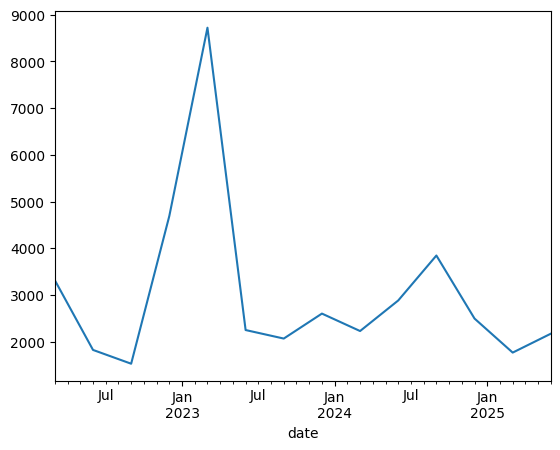

In [32]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-33-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: ylabel='date'>

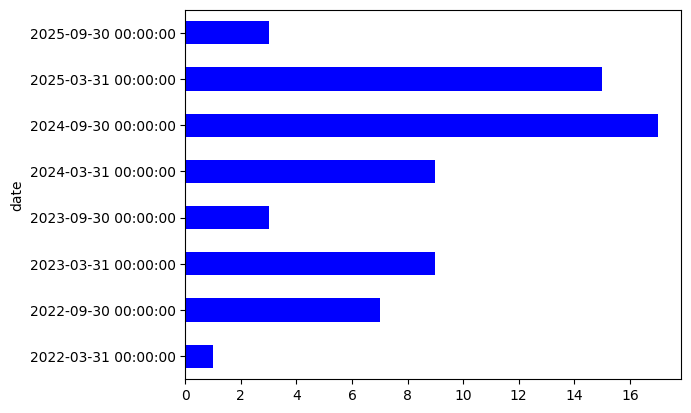

In [33]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [34]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [35]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-36-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/tmp/ipython-input-36-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-36-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-36-175908563.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/tmp/ipython-input-36-175908563.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' inst

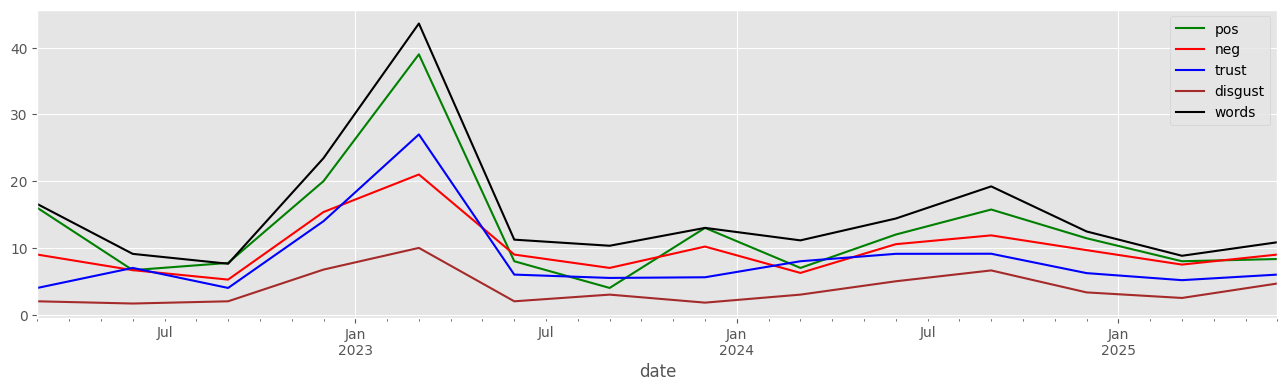

In [36]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [37]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-38-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))


<Axes: xlabel='date'>

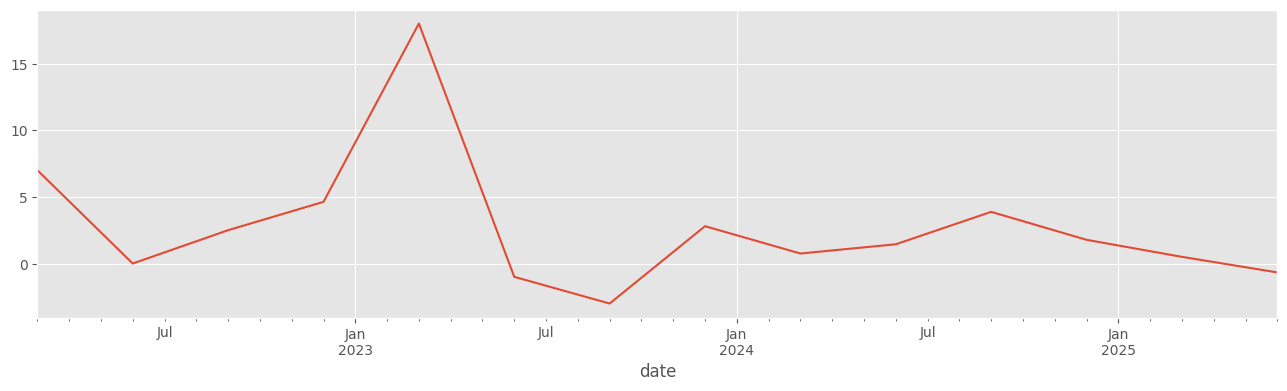

In [38]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [39]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-40-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-40-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: xlabel='date'>

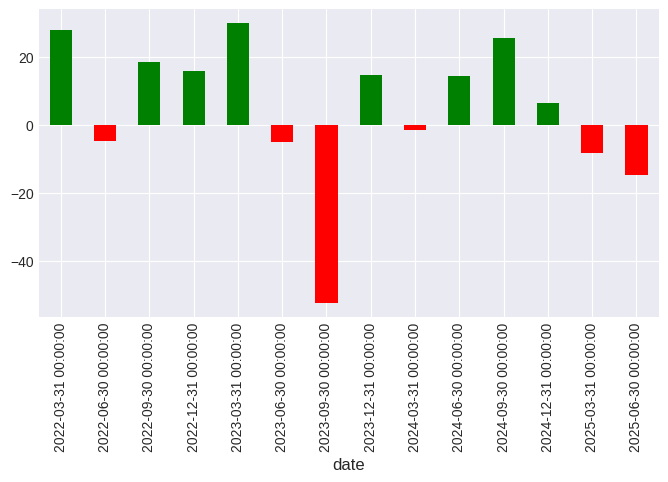

In [40]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-41-2877103554.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()


<Axes: xlabel='date'>

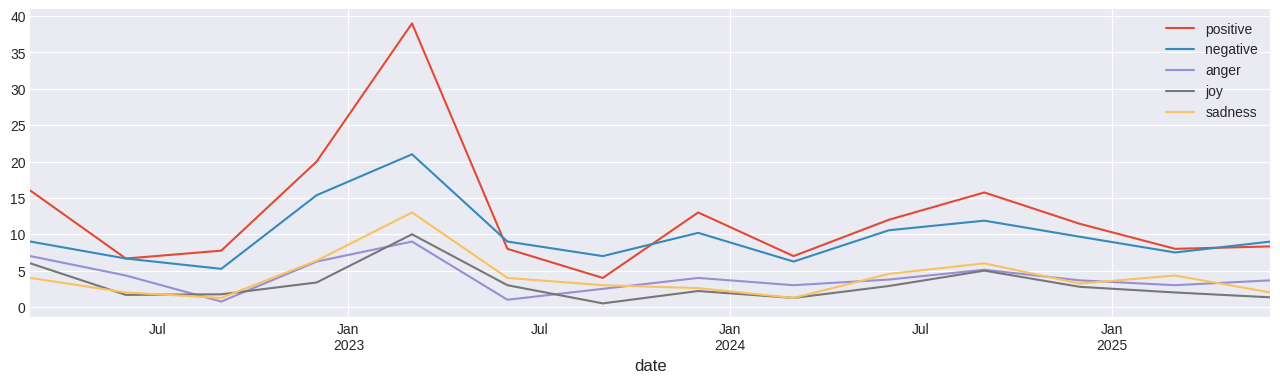

In [41]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})

# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line')

In [42]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

positive  negative  (-)αρνητικότητα | θετικότητα(+)
date                                                           
2024-06-25         9         1                               80
2023-09-15         0         5                             -100

In [43]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

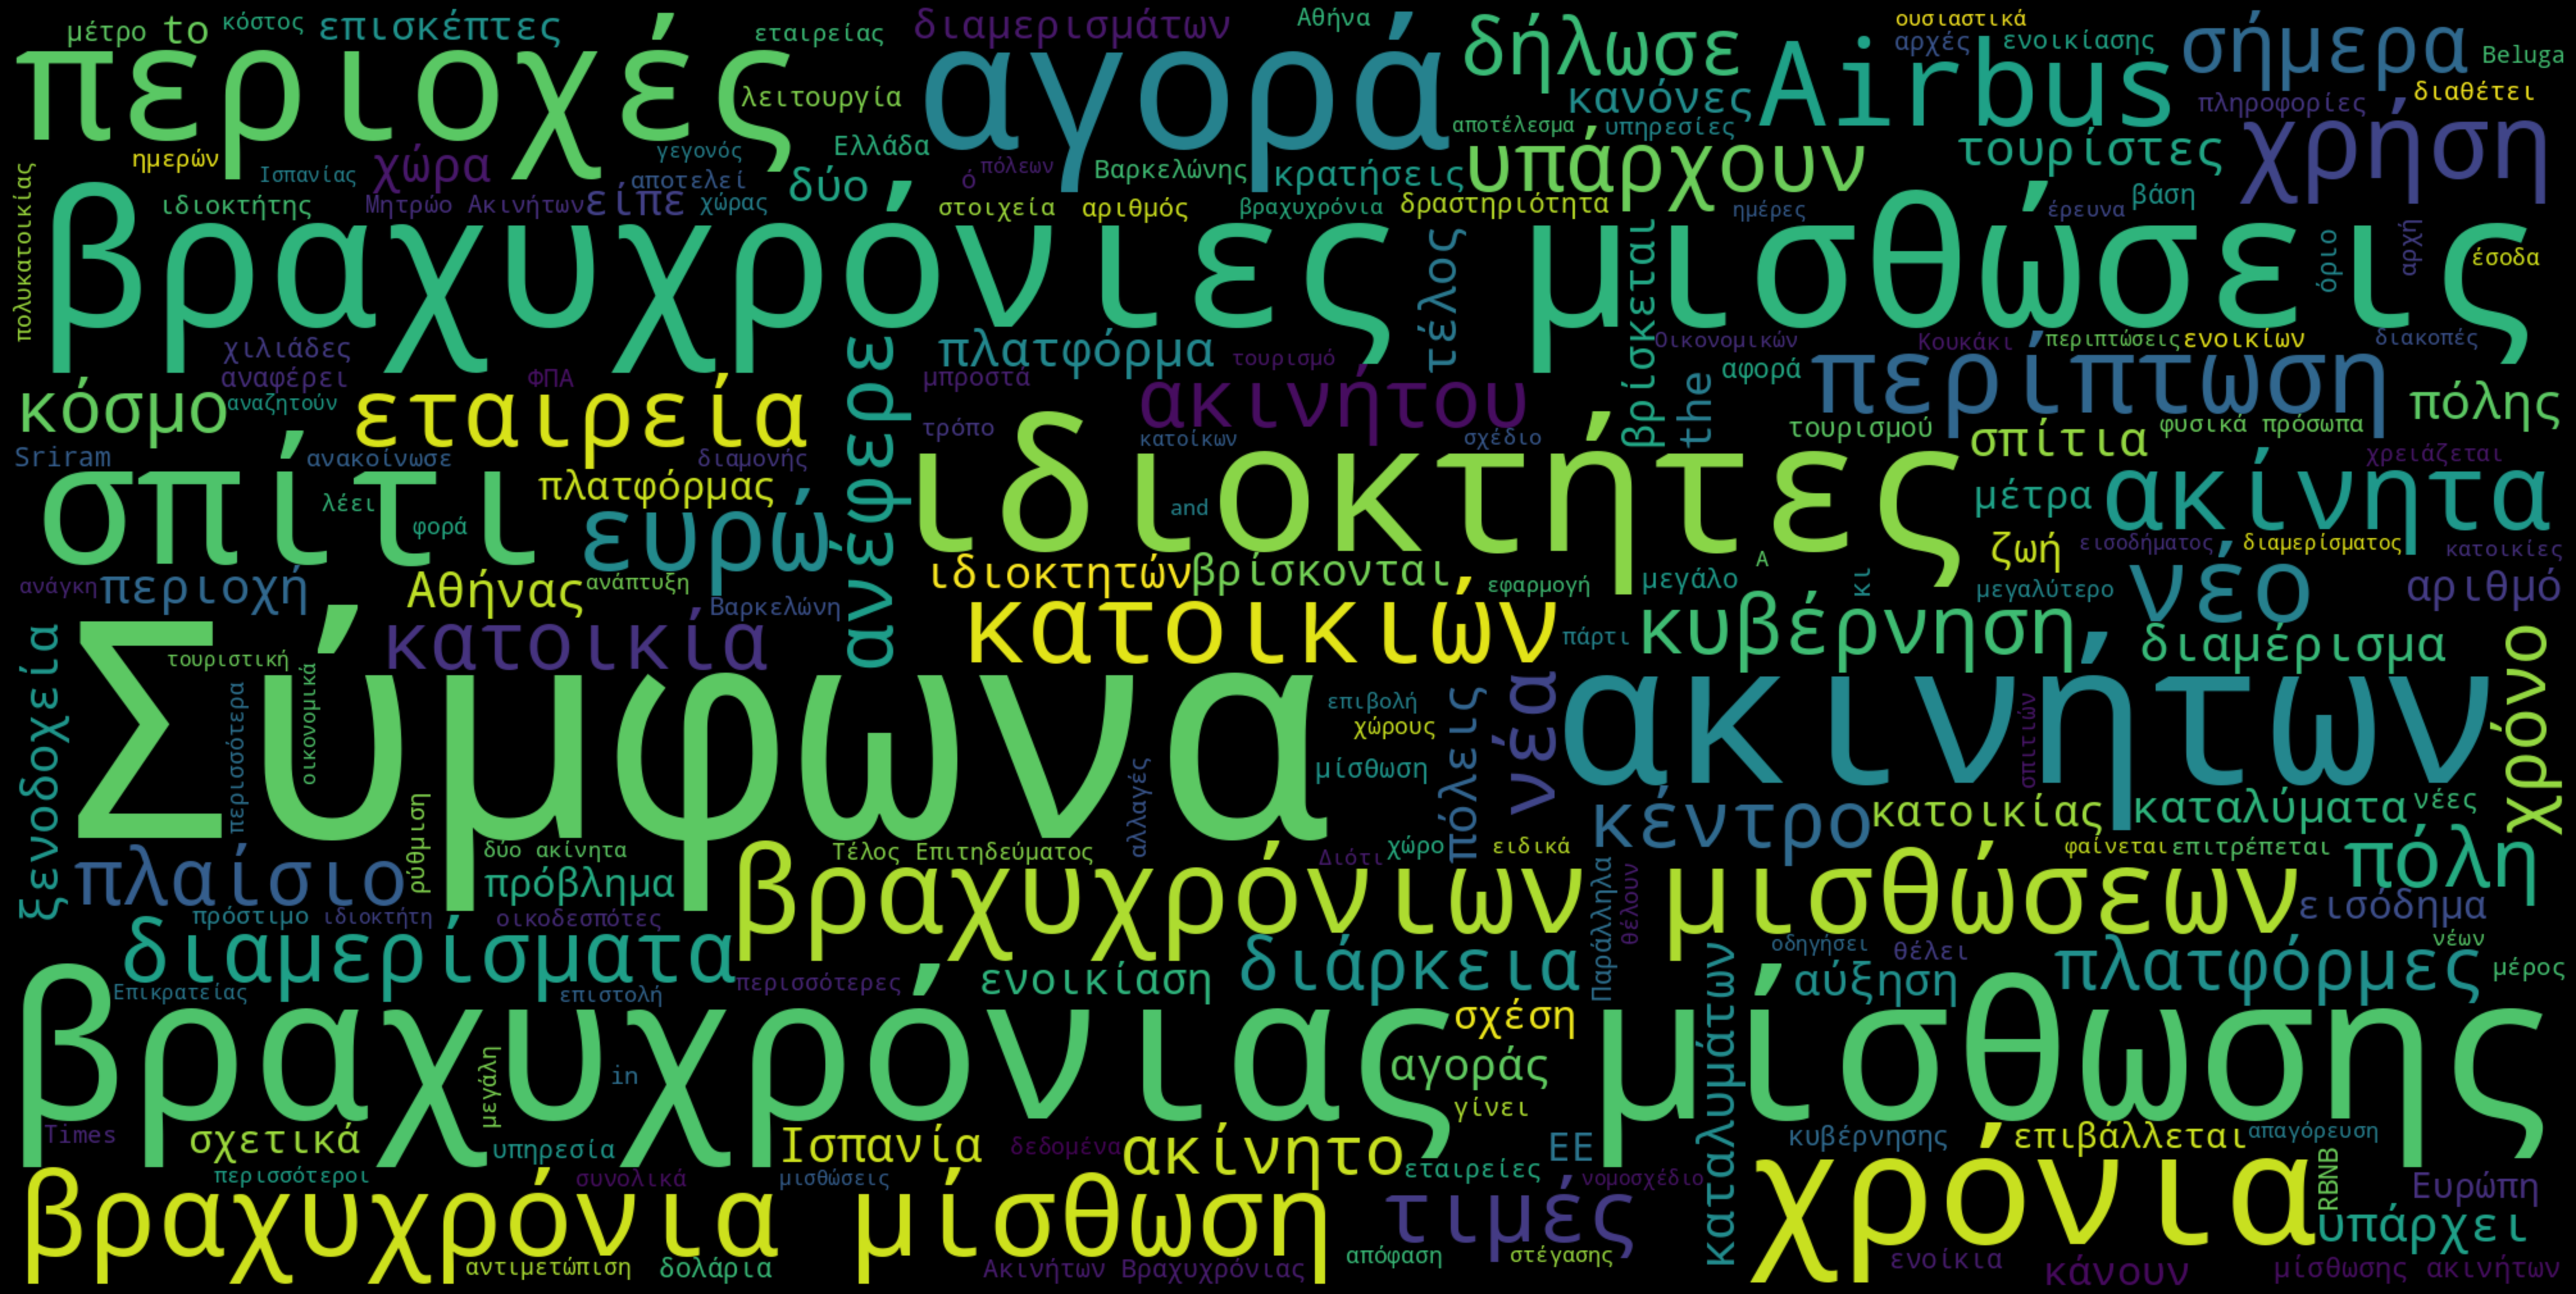

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'airbnb', 'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [45]:
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', na=False)
print(short_airbnb_df[mask])

                                                         text  anger  \
date                                                                   
2025-02-07  Ο δήμος της Βαρκελώνης θα αγοράσει μια πολυκατ...      5   
2025-01-13  Η Ισπανία σχεδιάζει να αυξήσει τους φόρους για...      3   
2024-10-07  Όταν μια υπουργός επικαλείται την αλληλεγγύη κ...      5   
2024-07-02  Στις 21 Ιουνίου, ο δήμαρχος της Βαρκελώνης Jau...     18   
2024-06-05  Αγαπητέ κύριε Πρωθυπουργέ, Ονομάζομαι ΝΓ κι εδ...     11   
2024-05-31  Όταν άκουσα τον πρωθυπουργό να λέει ότι στο πλ...      6   
2024-05-28  Μια 31χρονη νοίκιασε το σπίτι της αξίας 1,675 ...     10   
2024-05-26  Νέες παρεμβάσεις για τα Airbnb εξετάζει η κυβέ...      0   
2023-11-08  Με το νέο νομοσχέδιο θεσπίζονται οι αλλαγές πο...      7   
2022-11-19  Στην τελική ευθεία βρίσκεται η επεξεργασία από...     15   
2022-07-31  Σε επιστολή με ημερομηνία 14 Ιουλίου, την οποί...      2   

            positive  joy  disgust  surprise  trust  anticipati

In [46]:
filtered_df = short_airbnb_df[mask]
filtered_df

text  anger  \
date                                                                   
2025-02-07  Ο δήμος της Βαρκελώνης θα αγοράσει μια πολυκατ...      5   
2025-01-13  Η Ισπανία σχεδιάζει να αυξήσει τους φόρους για...      3   
2024-10-07  Όταν μια υπουργός επικαλείται την αλληλεγγύη κ...      5   
2024-07-02  Στις 21 Ιουνίου, ο δήμαρχος της Βαρκελώνης Jau...     18   
2024-06-05  Αγαπητέ κύριε Πρωθυπουργέ, Ονομάζομαι ΝΓ κι εδ...     11   
2024-05-31  Όταν άκουσα τον πρωθυπουργό να λέει ότι στο πλ...      6   
2024-05-28  Μια 31χρονη νοίκιασε το σπίτι της αξίας 1,675 ...     10   
2024-05-26  Νέες παρεμβάσεις για τα Airbnb εξετάζει η κυβέ...      0   
2023-11-08  Με το νέο νομοσχέδιο θεσπίζονται οι αλλαγές πο...      7   
2022-11-19  Στην τελική ευθεία βρίσκεται η επεξεργασία από...     15   
2022-07-31  Σε επιστολή με ημερομηνία 14 Ιουλίου, την οποί...      2   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-02-07        20    3        6         4     11             4        7   
2025-01-13        13    4        6         2     12             6        5   
2024-10-07        18    3        5         5     12             8       11   
2024-07-02        41   15       15         8     20            15       15   
2024-06-05        21    3       10         2     14             8       10   
2024-05-31        16    6       13         3     13            12       10   
2024-05-28        25    5       14         5     19             7        7   
2024-05-26        13    6        2         0      9             4        2   
2023-11-08        15    1        2         4      4             2        3   
2022-11-19        46    6       10         6     24             9       20   
2022-07-31        15    2        1         1      8             7        1   

            negative  fear  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
date                                                                  
2025-02-07        12    10        8                               25  
2025-01-13        10     7        3                               13  
2024-10-07        20    11       -2                               -5  
2024-07-02        32    18        9                               13  
2024-06-05        25    12       -4                               -9  
2024-05-31        16    10        0                                0  
2024-05-28        21     9        4                                9  
2024-05-26         4     2        9                               53  
2023-11-08        16     6       -1                               -3  
2022-11-19        33    14       13                               17  
2022-07-31        12     3        3                               11

In [47]:
len(filtered_df)

11

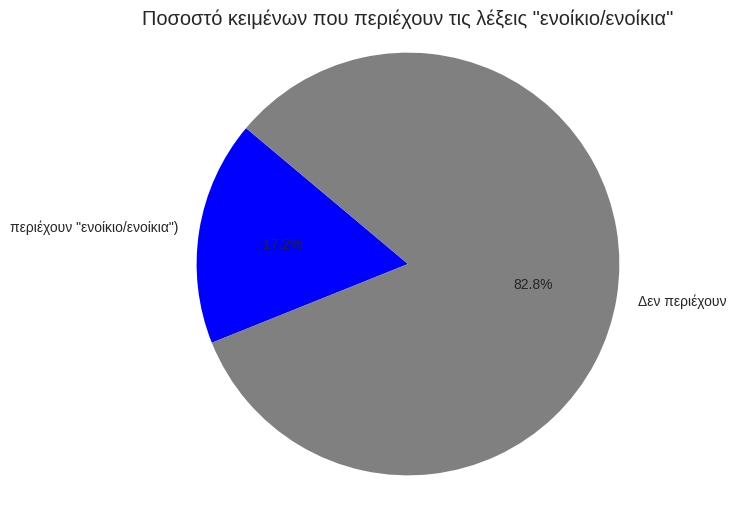

In [48]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'ενοίκια|ενοίκιο', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "ενοίκιο/ενοίκια")', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "ενοίκιο/ενοίκια"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()